In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

dataset = "64_kaggle.npz"

In [3]:
loaded = np.load(dataset)

train_images = loaded["train_images"]
test_images = loaded["test_images"]
train_labels = loaded["train_labels"]
test_labels = loaded["test_labels"]
train_weights = loaded["train_weights"]
test_weights = loaded["test_weights"]

SIZE = train_images[0].shape[0]

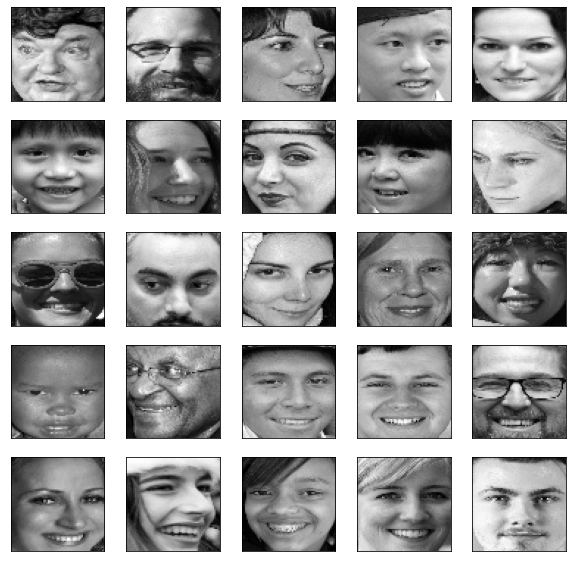

In [4]:


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    idx = np.random.choice(len(train_images))
    plt.imshow(train_images[idx], cmap = "gray")
    if(train_labels[idx] == 1):
        text = "Smiling"
    else:
        text = "Not Smiling"
    plt.xlabel(text, color = "white")
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(SIZE, (3, 3), activation='relu', input_shape=(SIZE, SIZE, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(SIZE * 2, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(SIZE, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(SIZE, activation='relu'))
model.add(layers.Dense(1))
model.summary()

2022-08-28 14:58:32.994216: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [7]:
history = model.fit(train_images, train_labels, epochs=1, 
                    validation_data=(test_images, test_labels, test_weights),
                    sample_weight=train_weights)

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')


2022-08-28 14:58:55.420378: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 39387136 exceeds 10% of free system memory.
2022-08-28 14:59:00.166846: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31490048 exceeds 10% of free system memory.
2022-08-28 14:59:01.547003: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31490048 exceeds 10% of free system memory.


 1/76 [..............................] - ETA: 5:11 - loss: 0.6945 - accuracy: 0.4375

2022-08-28 14:59:01.808236: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31490048 exceeds 10% of free system memory.
2022-08-28 14:59:02.971774: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31490048 exceeds 10% of free system memory.


25/76 [========>.....................] - ETA: 1:13 - loss: 0.6920 - accuracy: 0.4750

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    idx = np.random.choice(len(test_images))
    plt.imshow(test_images[idx], cmap = "gray")
    text = "{:.2f}".format(tf.math.sigmoid(model.predict(np.array( [test_images[idx],]))[0][0]))
    plt.xlabel(text, color = "white")
plt.show()

In [ ]:
model.save("model_" + dataset)